In [20]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
import statsmodels.datasets as smd

In [4]:
ad = pd.read_csv('https://www.statlearning.com/s/Advertising.csv', index_col=0)

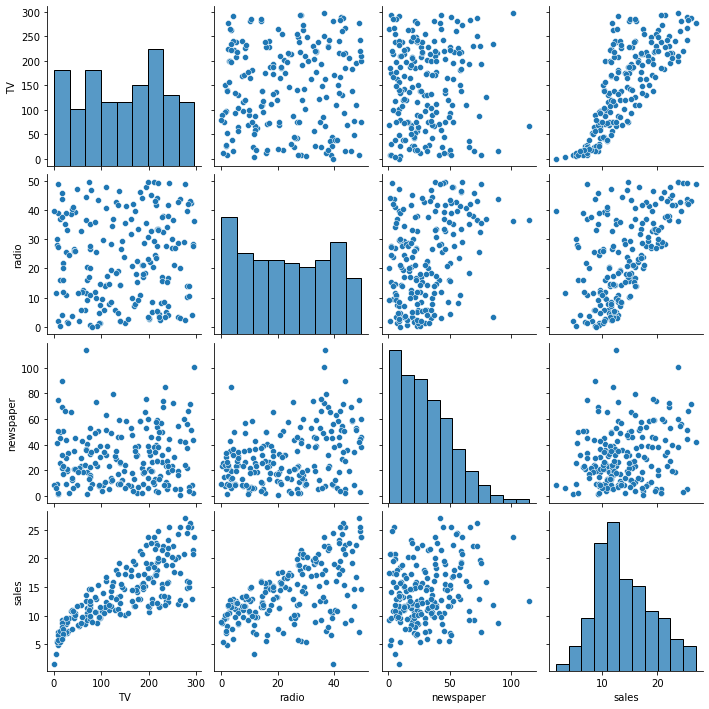

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [8]:
sns.pairplot(ad)
plt.show()
ad.corr()

In [14]:
formula = "sales ~ TV + radio + newspaper"
result = sm.formula.ols(formula, data=ad).fit()

In [16]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Tue, 02 Nov 2021   Prob (F-statistic):           1.58e-96
Time:                        11:43:33   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
# AIC
result.llf*(-2)+2*(result.df_model+1)

780.3622358887662

In [21]:
# BIC
-2*result.llf + math.log(result.nobs)*(result.df_model+1)

793.5555053549584

In [26]:
hatsigma2 = ((result.resid)**2).sum()/result.df_resid
hatsigma2, result.scale

(2.8409452188887103, 2.8409452188887103)

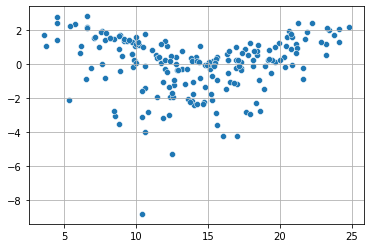

In [29]:
sns.scatterplot(x=result.fittedvalues, y=result.resid)
plt.grid()

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
y = ad.sales
X = ad[ad.columns[:3]]

In [33]:
X,y

(        TV  radio  newspaper
 1    230.1   37.8       69.2
 2     44.5   39.3       45.1
 3     17.2   45.9       69.3
 4    151.5   41.3       58.5
 5    180.8   10.8       58.4
 ..     ...    ...        ...
 196   38.2    3.7       13.8
 197   94.2    4.9        8.1
 198  177.0    9.3        6.4
 199  283.6   42.0       66.2
 200  232.1    8.6        8.7
 
 [200 rows x 3 columns],
 1      22.1
 2      10.4
 3       9.3
 4      18.5
 5      12.9
        ... 
 196     7.6
 197     9.7
 198    12.8
 199    25.5
 200    13.4
 Name: sales, Length: 200, dtype: float64)

In [34]:
lm = LinearRegression()
lm.fit(y=y, X=X)

LinearRegression()

In [43]:
print(f'sklearn fit:\n intercept={lm.intercept_}\n coef={lm.coef_}\n', result.params, sep="\n")

sklearn fit:
 intercept=2.938889369459412
 coef=[ 0.04576465  0.18853002 -0.00103749]

Intercept    2.938889
TV           0.045765
radio        0.188530
newspaper   -0.001037
dtype: float64


In [44]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

In [75]:
X1 = X.copy()
X1['TV x radio'] = X1.TV*X1.radio

In [78]:
res1 = LinearRegression()
res1.fit(y=y, X=X1)


LinearRegression()

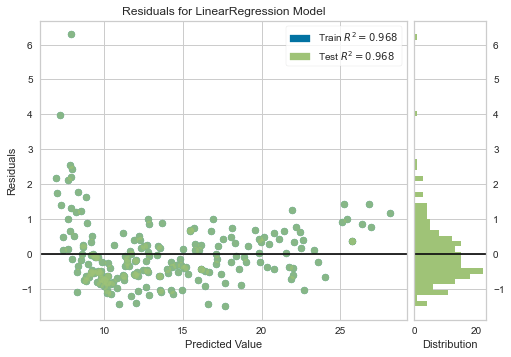

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [83]:
import yellowbrick.regressor as yr
model = yr.ResidualsPlot(LinearRegression())
model.fit(X1, y)
model.score(X1, y)
model.show()

/home/prokaj/.local/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


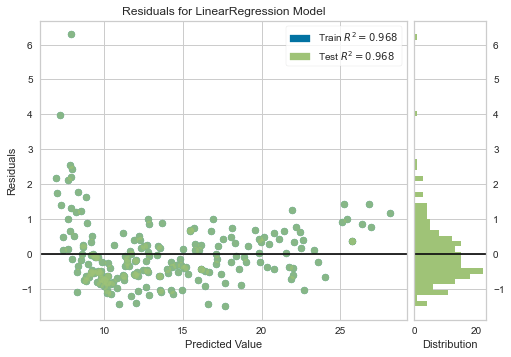

AttributeError: 'LinearRegression' object has no attribute 'line_color'

AttributeError: 'LinearRegression' object has no attribute 'line_color'

In [79]:
yr.residuals_plot(res1, y_train=y, X_train=X1)

In [80]:
yr.ResidualsPlot?

Init signature:
yr.ResidualsPlot(
    estimator,
    ax=None,
    hist=True,
    qqplot=False,
    train_color='b',
    test_color='g',
    line_color='#111111',
    train_alpha=0.75,
    test_alpha=0.75,
    is_fitted='auto',
    **kwargs,
)
Docstring:     
A residual plot shows the residuals on the vertical axis and the
independent variable on the horizontal axis.

If the points are randomly dispersed around the horizontal axis, a linear
regression model is appropriate for the data; otherwise, a non-linear
model is more appropriate.

Parameters
----------
estimator : a Scikit-Learn regressor
    Should be an instance of a regressor, otherwise will raise a
    YellowbrickTypeError exception on instantiation.
    If the estimator is not fitted, it is fit when the visualizer is fitted,
    unless otherwise specified by ``is_fitted``.

ax : matplotlib Axes, default: None
    The axes to plot the figure on. If None is passed in the current axes
    will be used (or generated if required).